# Part D(a): LQR Design for a Linear System

In [1]:
import numpy as np
from scipy import signal
from scipy.linalg import solve_continuous_are
import matplotlib.pyplot as plt
from scipy.signal import lsim

In [2]:
# 1. Define system parameters
M = 1000  # Mass of the cart
m1 = 100  # Mass of Pendulum 1
m2 = 100  # Mass of Pendulum 2
l1 = 20   # Length of the string of Pendulum 1
l2 = 10   # Length of the string of Pendulum 2
g = 9.81  # Acceleration due to gravity (m/s^2)

Matrix A (State Matrix): This matrix represents the system dynamics. It defines how the current state of the system (e.g., position, velocity) affects the future state.

In [3]:

A = np.array([[0, 1, 0, 0, 0, 0],
              [0, 0, -(m1*g)/M, 0, -(m2*g)/M, 0],
              [0, 0, 0, 1, 0, 0],
              [0, 0, -((M+m1)*g)/(M*l1), 0, -(m2*g)/(M*l1), 0],
              [0, 0, 0, 0, 0, 1],
              [0, 0, -(m1*g)/(M*l2), 0, -(g*(M+m2))/(M*l2), 0]])
print("A = ")
A

A = 


array([[ 0.     ,  1.     ,  0.     ,  0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.     , -0.981  ,  0.     , -0.981  ,  0.     ],
       [ 0.     ,  0.     ,  0.     ,  1.     ,  0.     ,  0.     ],
       [ 0.     ,  0.     , -0.53955,  0.     , -0.04905,  0.     ],
       [ 0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  1.     ],
       [ 0.     ,  0.     , -0.0981 ,  0.     , -1.0791 ,  0.     ]])

B matrix represents how the input to the system (e.g., control actions) affects its state. It's used along with matrix A in the state equation to describe the effect of the control input on the state.

In [4]:
B = np.array([[0], [1/M], [0], [1/(M*l1)], [0], [1/(M*l2)]])
print("B = ")
B

B = 


array([[0.e+00],
       [1.e-03],
       [0.e+00],
       [5.e-05],
       [0.e+00],
       [1.e-04]])

Controllability Matrix: It is used to determine whether the system's state can be fully controlled by its inputs. A system is controllable if its controllability matrix has full rank (i.e., the rank is equal to the number of states in the system).

In [5]:
controllability_matrix = np.column_stack([B, A@B, A@A@B, A@A@A@B, A@A@A@A@B, A@A@A@A@A@B])
print ("Controllability matrix = ")
controllability_matrix

Controllability matrix = 


array([[ 0.00000000e+00,  1.00000000e-03,  0.00000000e+00,
        -1.47150000e-04,  0.00000000e+00,  1.41948247e-04],
       [ 1.00000000e-03,  0.00000000e+00, -1.47150000e-04,
         0.00000000e+00,  1.41948247e-04,  0.00000000e+00],
       [ 0.00000000e+00,  5.00000000e-05,  0.00000000e+00,
        -3.18825000e-05,  0.00000000e+00,  2.27357786e-05],
       [ 5.00000000e-05,  0.00000000e+00, -3.18825000e-05,
         0.00000000e+00,  2.27357786e-05,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e-04,  0.00000000e+00,
        -1.12815000e-04,  0.00000000e+00,  1.24866340e-04],
       [ 1.00000000e-04,  0.00000000e+00, -1.12815000e-04,
         0.00000000e+00,  1.24866340e-04,  0.00000000e+00]])

In [6]:
# 3. Check system controllability
if np.linalg.matrix_rank(controllability_matrix) == 6:
    print("System is controllable. Rank = ", np.linalg.matrix_rank(controllability_matrix))
else:
    print("System is uncontrollable")

System is controllable. Rank =  6


Matrix C (Output Matrix): This matrix maps the state of the system to the output. It's used in the output equation: y = C * x + D * u, where y is the system output.
Matrix D (Feedthrough Matrix): This matrix represents the direct effect of the input on the output. In many systems, D is a zero matrix (especially in systems where the input does not directly affect the output).

In [7]:
# 4. Set initial conditions and define output matrix
x_initial = np.array([0, 0, 20, 0, 40, 0])  # Initial state
C = np.eye(6)  # Output matrix
D = np.zeros((6, 1))  # D matrix

Matrix P (Solution to the Riccati Equation): In the context of LQR (Linear Quadratic Regulator) control, P is the solution to the algebraic Riccati equation. It's used to calculate the optimal state feedback gains.

In [8]:
# 5. Implement and analyze LQR controller
Q = np.diag([100, 100, 1000, 1000, 1000, 1000])
# Redefine R as a 2D array
R = np.array([[0.001]])
# Implement and analyze LQR controller using solve_continuous_are
P = solve_continuous_are(A, B, Q, R)
print("P = ")
P

P = 


array([[ 3.07237373e+02,  4.21974016e+02, -1.59102584e+01,
        -1.00945627e+03,  1.80640060e+01, -5.52734368e+02],
       [ 4.21974016e+02,  1.29624234e+03,  9.60574010e+02,
        -3.13386374e+03,  6.08233745e+02, -1.67979268e+03],
       [-1.59102584e+01,  9.60574010e+02,  2.98194336e+04,
        -4.98734318e+02,  2.65154203e+02, -3.50872508e+03],
       [-1.00945627e+03, -3.13386374e+03, -4.98734318e+02,
         6.09545594e+04,  3.50585105e+03,  3.58231173e+02],
       [ 1.80640060e+01,  6.08233745e+02,  2.65154203e+02,
         3.50585105e+03,  1.69613833e+04, -4.98368458e+02],
       [-5.52734368e+02, -1.67979268e+03, -3.50872508e+03,
         3.58231173e+02, -4.98368458e+02,  1.71900452e+04]])

Matrix K (Feedback Gain Matrix): This is the gain matrix used in LQR. It is calculated based on the system matrices (A, B) and the weighting matrices (Q and R) used in the LQR design. The matrix K is used to determine the control action as u = -K * x, aiming to minimize a cost function that balances state error and control effort.

In [9]:
K = np.dot(np.linalg.inv(R), np.dot(B.T, P))
print("K = ")
K

K = 


array([[316.22776602, 971.56988044, 584.7647864 , -50.31265473,
        733.68945161,  57.12340249]])

In [10]:
# Time array for simulation
t = np.linspace(0, 1000, 1000)
# Zero input signal
u = np.zeros_like(t)

In [11]:
# System without controller
sys1 = signal.StateSpace(A, B, C, D)
_, y1, x1 = lsim(sys1, U=u, T=t, X0=x_initial)

In [12]:
# System with LQR controller
A_cl = A - np.dot(B, K)
print("A matrix of closed loop system defined by A_cl = A - BK = ")
A_cl

A matrix of closed loop system defined by A_cl = A - BK = 


array([[ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.31622777, -0.97156988, -1.56576479,  0.05031265, -1.71468945,
        -0.0571234 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [-0.01581139, -0.04857849, -0.56878824,  0.00251563, -0.08573447,
        -0.00285617],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.03162278, -0.09715699, -0.15657648,  0.00503127, -1.15246895,
        -0.00571234]])

In [13]:
closed_loop_eigenvalues = np.linalg.eigvals(A_cl)
print("Closed-Loop Eigenvalues:")
closed_loop_eigenvalues

Closed-Loop Eigenvalues:


array([-0.38230955+0.35462265j, -0.38230955-0.35462265j,
       -0.07230465+1.03416433j, -0.07230465-1.03416433j,
       -0.0327691 +0.72083929j, -0.0327691 -0.72083929j])

In [14]:
sys2 = signal.StateSpace(A_cl, B, C, D)
_, y2, x2 = lsim(sys2, U=u, T=t, X0=x_initial)

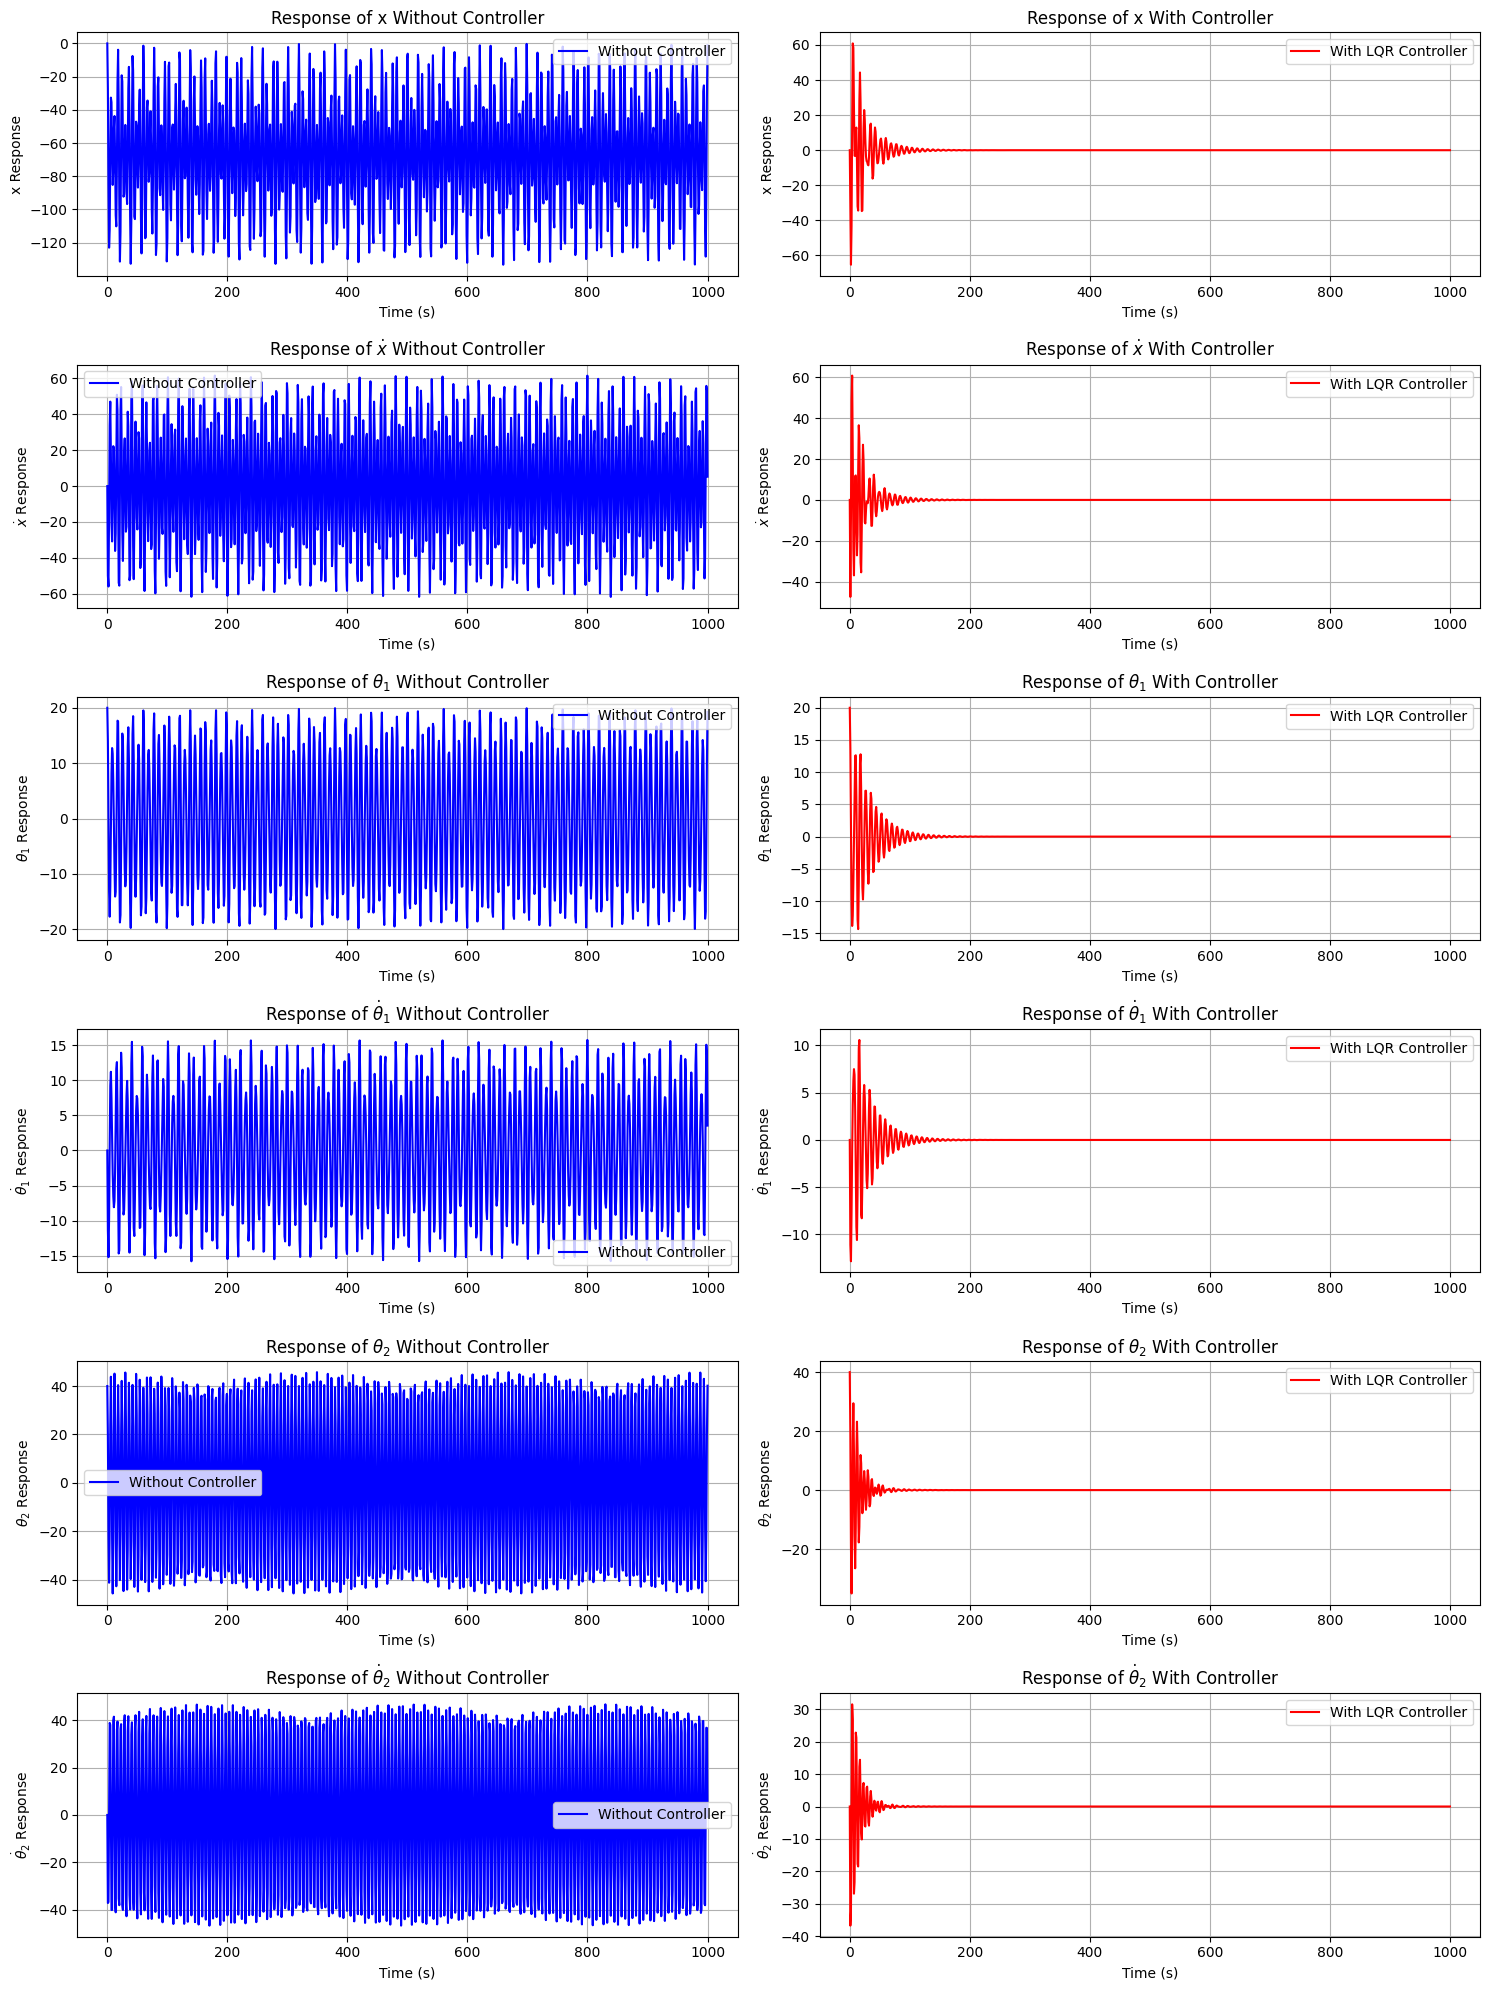

In [15]:
# State variable names
state_vars = ['x', '$\dot{x}$', '$\\theta_1$', '$\dot{\\theta}_1$', '$\\theta_2$', '$\dot{\\theta}_2$']

# Set up the figure and axes for the subplots
fig, axes = plt.subplots(nrows=len(state_vars), ncols=2, figsize=(15, 20))

# Plotting the responses for each state variable
for i in range(len(state_vars)):
    # Response without controller
    axes[i, 0].plot(t, x1[:, i], 'b-', label='Without Controller')
    axes[i, 0].set_title(f'Response of {state_vars[i]} Without Controller')
    axes[i, 0].set_xlabel('Time (s)')
    axes[i, 0].set_ylabel(f'{state_vars[i]} Response')
    axes[i, 0].grid(True)
    axes[i, 0].legend()

    # Response with LQR controller
    axes[i, 1].plot(t, x2[:, i], 'r-', label='With LQR Controller')
    axes[i, 1].set_title(f'Response of {state_vars[i]} With Controller')
    axes[i, 1].set_xlabel('Time (s)')
    axes[i, 1].set_ylabel(f'{state_vars[i]} Response')
    axes[i, 1].grid(True)
    axes[i, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

Observation: Decreasing the value of 'R' leads to quicker stabilization; however, it results in significantly higher energy consumption.